# Purpose 

This notebook is meant to quickly understand why the decoding algorithm / other part of the pipeline didn't work for a particular subject / run, using the trigger channels, identifying the bad channels, etc..

In [3]:
# Imports

import mne
import mne_bids
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib
matplotlib.use("Agg")
mne.set_log_level(False)
import time
import os


%matplotlib inline

In [29]:
# CONST DEFINITION

subject_to_debug = '181017'
bids = Path("/home/is153802/workspace_LPP/data/MEG/LPP/BIDS")
TASK = 'listen'

In [35]:
bids_path = mne_bids.BIDSPath(
                subject=subject_to_debug,
                session='01',
                task=TASK,
                datatype="meg",
                root=bids,
                run = '07'
            )

print(bids_path)
raw_bids = mne_bids.read_raw_bids(bids_path)

raw_bids.load_data()

/home/is153802/workspace_LPP/data/MEG/LPP/BIDS/sub-181017/ses-01/meg/sub-181017_ses-01_task-listen_run-07_meg.fif


/tmp/ipykernel_346973/2699540483.py:11: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw_bids = mne_bids.read_raw_bids(bids_path)
/tmp/ipykernel_346973/2699540483.py:11: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, STI009, STI010, STI011, STI012, STI013, STI014, STI015, STI016, STI101, STI201, STI301 has changed from V to NA.
  raw_bids = mne_bids.read_raw_bids(bids_path)


<Raw | sub-181017_ses-01_task-listen_run-07_meg.fif, 400 x 685000 (685.0 s), ~2.05 GB, data loaded>

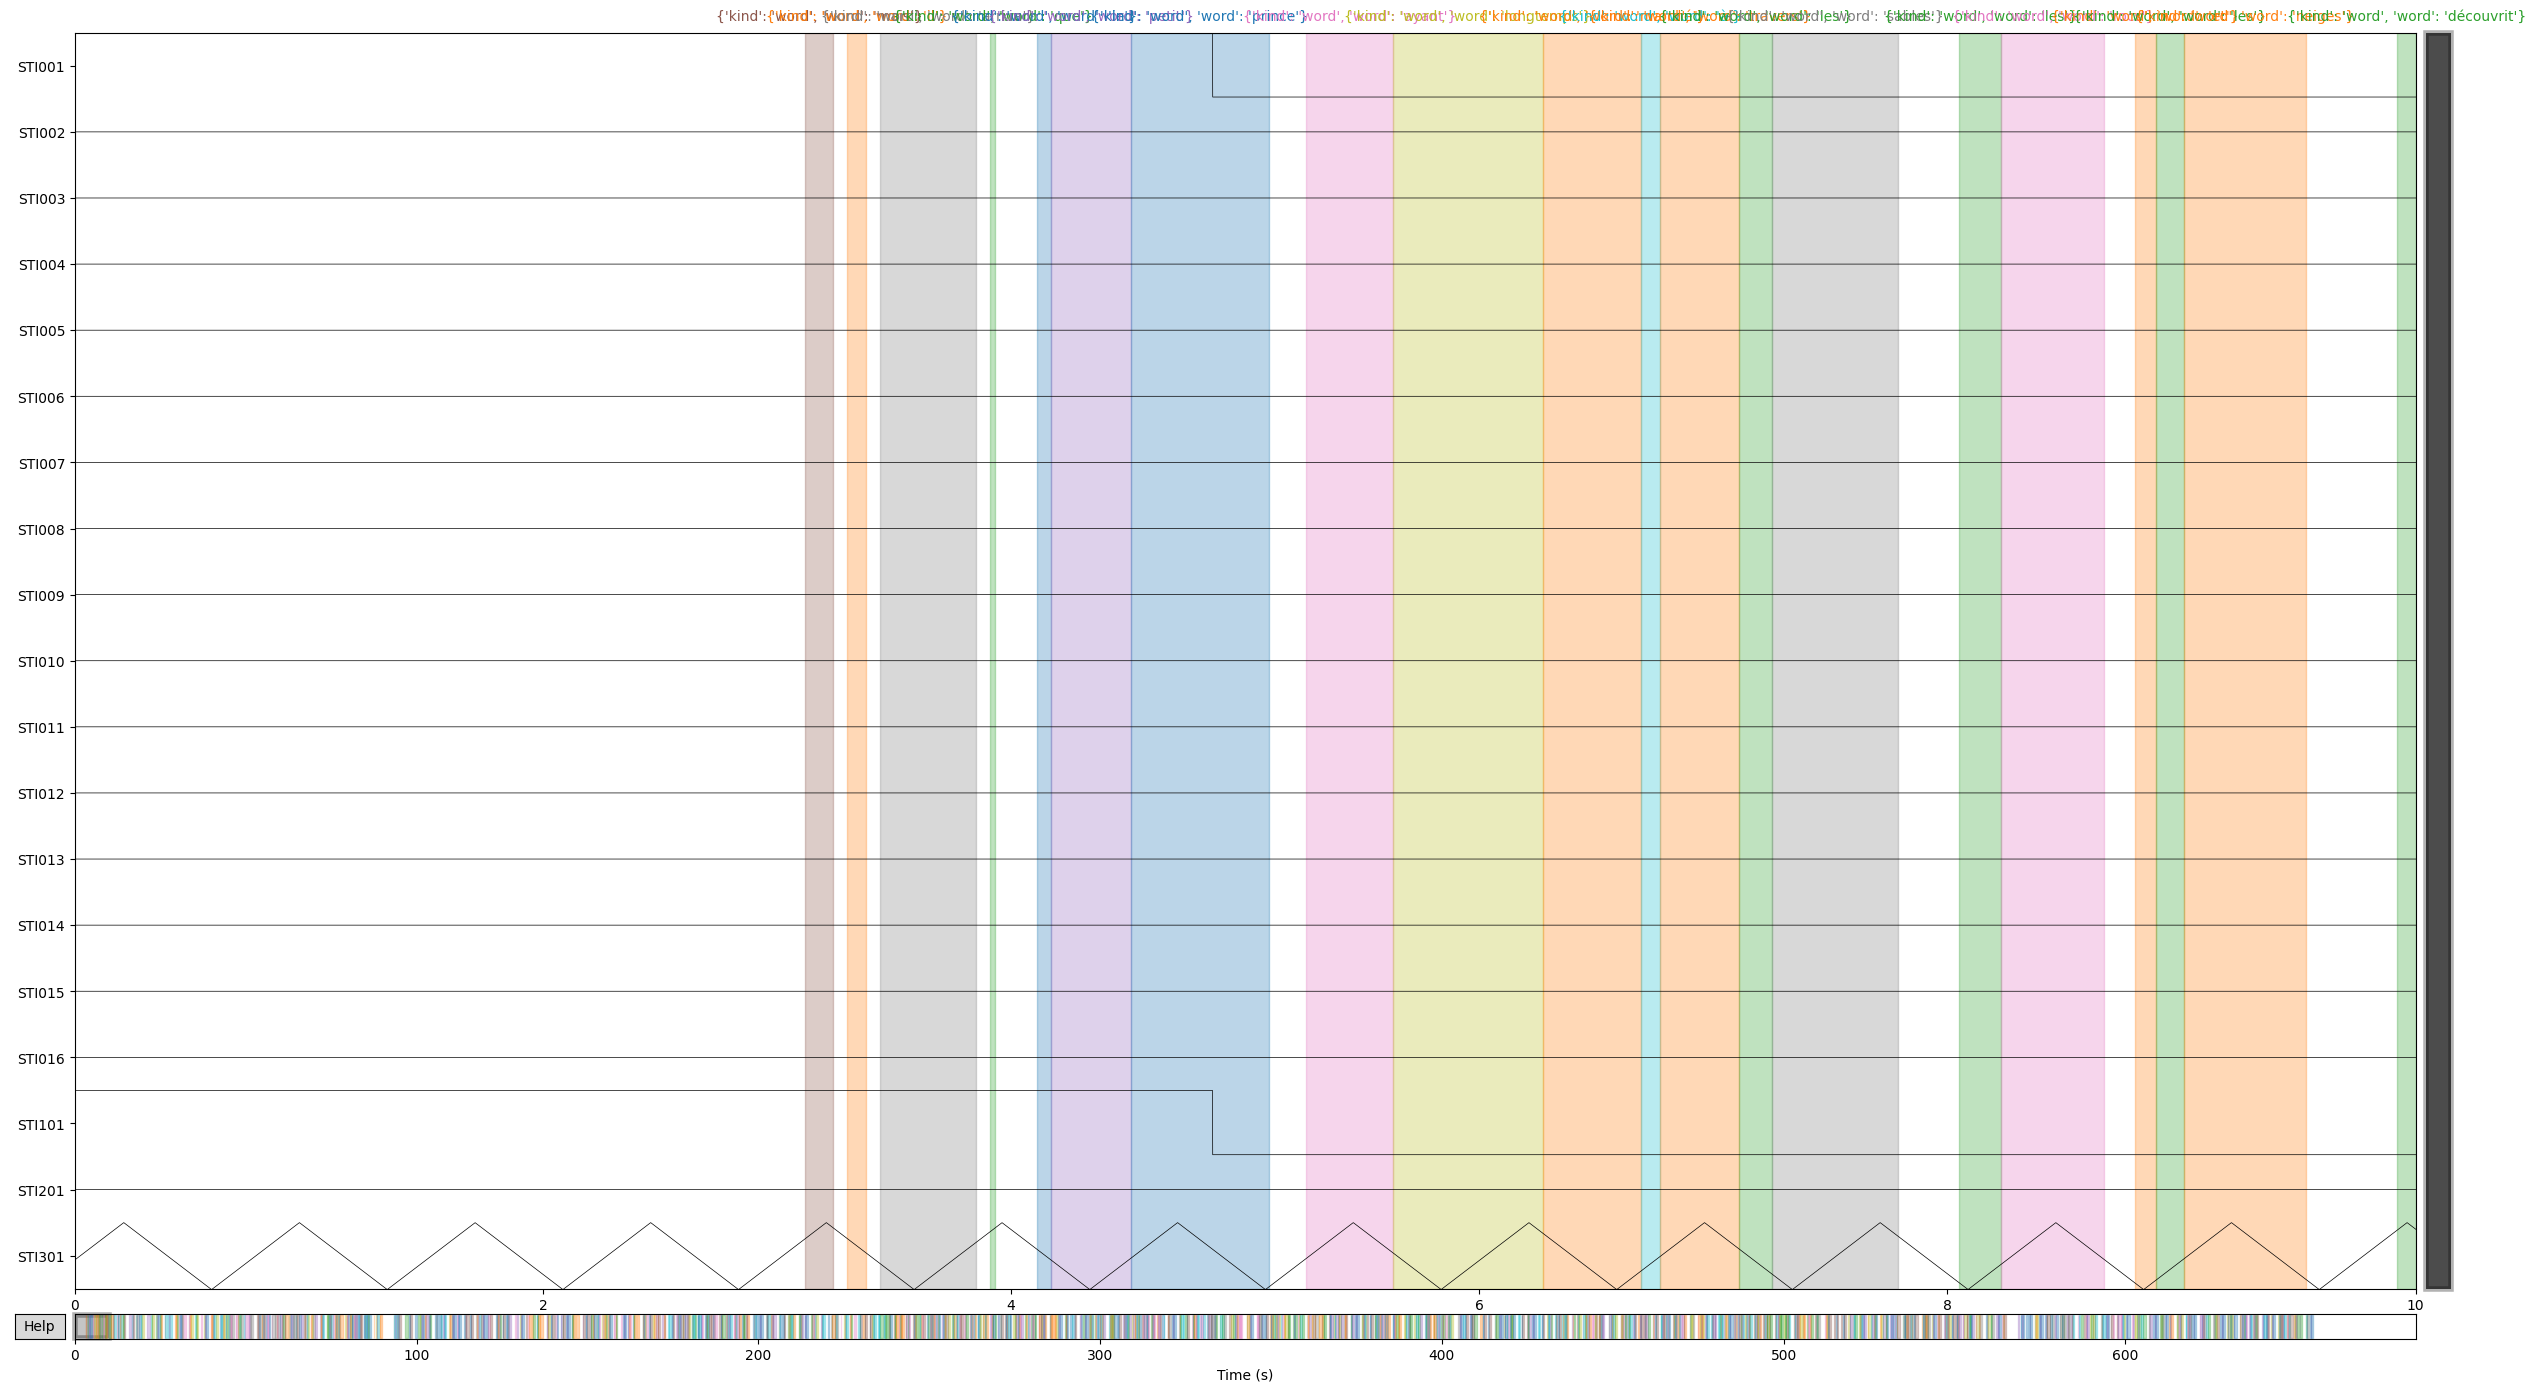

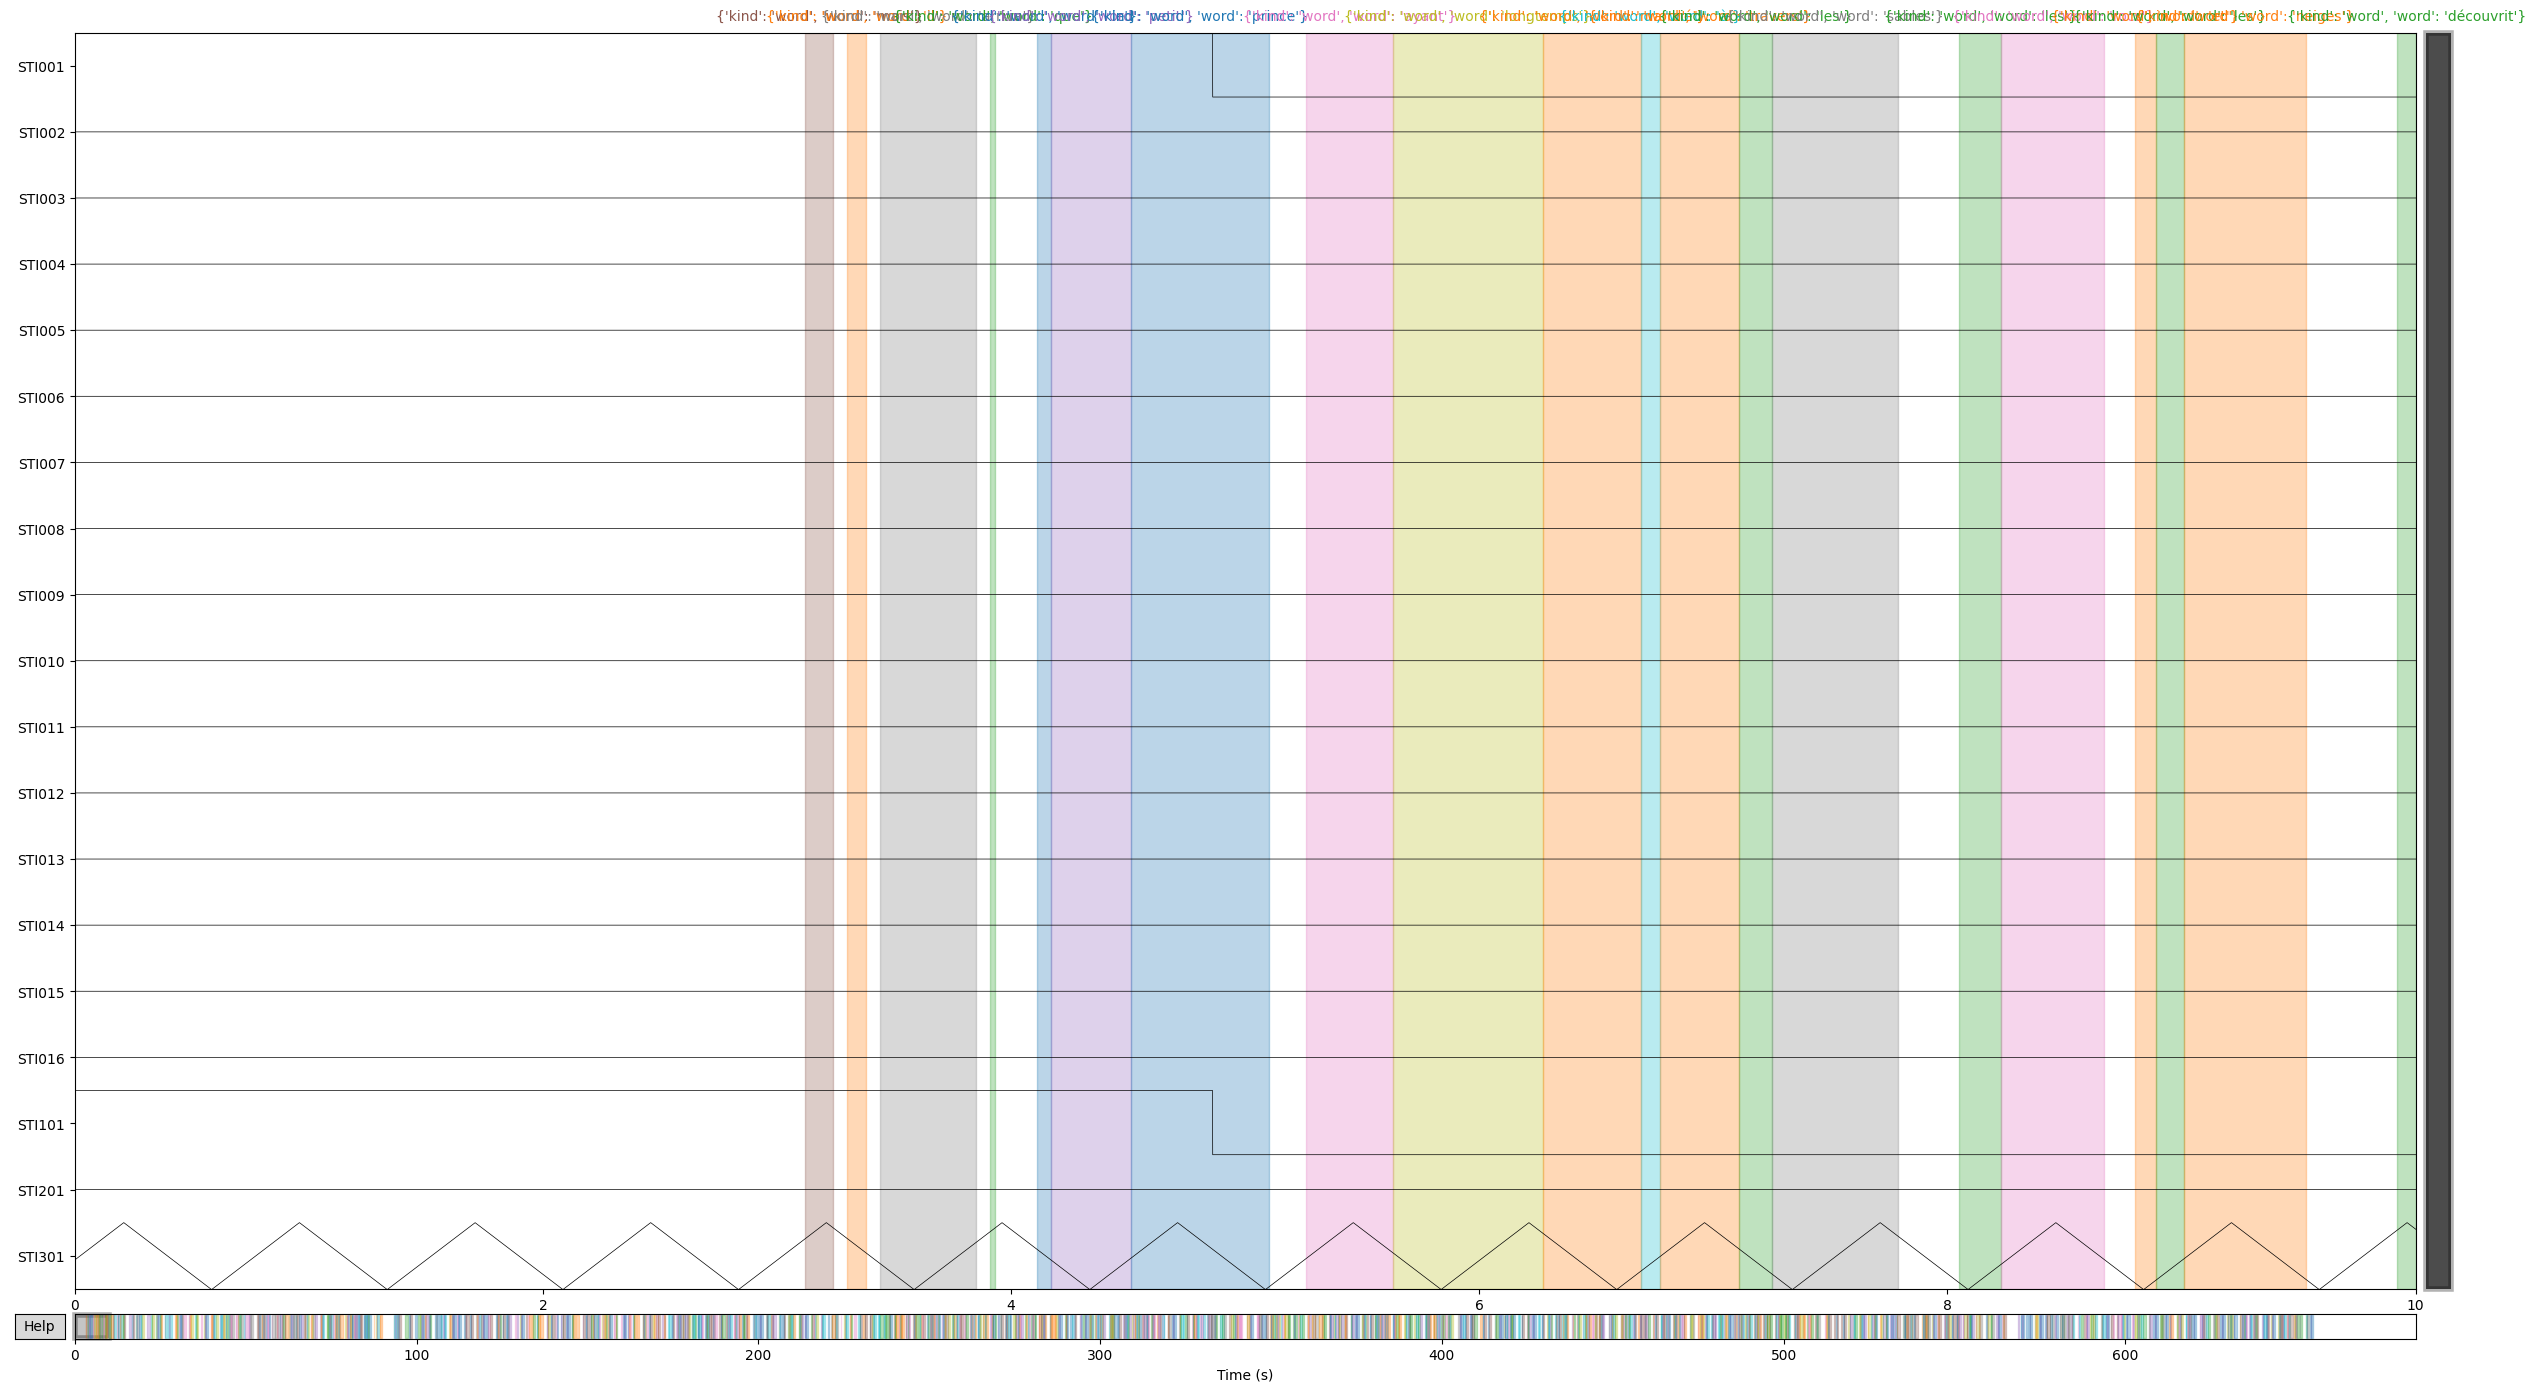

In [36]:
raw_ = raw_bids.copy().pick_types(meg=False, stim=True)
raw_.plot(start = 0, duration = 10)
# events = mne.find_events(raw_, stim_channel='STI101')
# print(events)

In [38]:
print(raw_.info['events'][0]['list'].shape)

(10185,)
